In [2]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 4.2 MB/s eta 0:00:01


In [4]:
!pip install sumy

     |████████████████████████████████| 97 kB 4.0 MB/s eta 0:00:011
     |████████████████████████████████| 10.1 MB 14.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21712 sha256=456eeccfdef5067945be106da33202b35bbcaaeec78e476b43f0ddc755ae7a5c
  Stored in directory: /Users/fahdmohammed/Library/Caches/pip/wheels/ba/9f/70/7795228568b81b57a8932755938da9fb1f291b0576752604aa
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=9a87c6595bd40a356cb40d501c0544fd4895b8c989fdc2bc5a6ed24bce330076
  Stored in directory: /Users/fahdmohammed/Library/Caches/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=6b96d9a43a8fe4948d2e666565b132b93ac2a8bb65f9c866af33f5c632

In [5]:
import os
import pandas as pd
from collections import Counter

#wordcloud
from PIL import Image
import numpy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#NLP Summarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

#NLP Sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer

# Textual Data Exploration

In [6]:
# Van Halen 1984 Album
album_folder = "./Data/1984 album Van Halen"
songs = os.listdir(album_folder)
songs

['Panama.txt',
 'Drop Dead Legs.txt',
 'Jump.txt',
 'Girl Gone Bad.txt',
 'Hot for Teacher.txt',
 'House of Pain.txt',
 'Top Jimmy.txt',
 "I'll Wait.txt"]

In [7]:
album_corpus = []

for lyrics in songs:
    with open(album_folder+'/'+lyrics, encoding ='utf8') as f_input:
        album_corpus.append(f_input.read())

In [8]:
album_corpus

["[Intro]\nOoh\nOh yeah\nUh-huh, ah!\n\n[Verse 1]\nJump back, what's that sound?\nHere she comes, full blast and top down\nHot shoe, burning down the avenue\nModel citizen, zero discipline\n\n[Pre-Chorus]\nDon't you know she's coming home to me?\nYou'll lose her in the turn\nI'll get her, ah!\n\n[Chorus]\nPanama\nPanama\nPanama\nPanama\n\n[Verse 2]\nAin't nothin' like it, her shiny machine\nGot the feel for the wheel, keep the moving parts clean\nHot shoe, burning down the avenue\nOut an on-ramp coming through my bedroom\n\n\n[Pre-Chorus]\nDon't you know she's coming home to me?\nYou'll lose her in the turn\nI'll get her, ah!\nUh-oh\n\n[Chorus]\nPanama\nPanama, ow\nPanama, ah\nPanama, oh-oh-oh-oh\nWoo!\n\n[Guitar Solo]\n\n[Spoken Interlude]\nAh\nYeah, we're running a little bit hot tonight\nI can barely see the road from the heat coming off it, I say\nI reach down between my legs and\nEase the seat back\n\n[Bridge]\nShe's blinding, I'm flying\nRight behind in rearview mirror now\nGot t

In [9]:
#getting words from the lyrics
album_word_list = []
for lyrics in album_corpus:
    for word in lyrics.split():
        album_word_list.append(word)

album_word_list

['[Intro]',
 'Ooh',
 'Oh',
 'yeah',
 'Uh-huh,',
 'ah!',
 '[Verse',
 '1]',
 'Jump',
 'back,',
 "what's",
 'that',
 'sound?',
 'Here',
 'she',
 'comes,',
 'full',
 'blast',
 'and',
 'top',
 'down',
 'Hot',
 'shoe,',
 'burning',
 'down',
 'the',
 'avenue',
 'Model',
 'citizen,',
 'zero',
 'discipline',
 '[Pre-Chorus]',
 "Don't",
 'you',
 'know',
 "she's",
 'coming',
 'home',
 'to',
 'me?',
 "You'll",
 'lose',
 'her',
 'in',
 'the',
 'turn',
 "I'll",
 'get',
 'her,',
 'ah!',
 '[Chorus]',
 'Panama',
 'Panama',
 'Panama',
 'Panama',
 '[Verse',
 '2]',
 "Ain't",
 "nothin'",
 'like',
 'it,',
 'her',
 'shiny',
 'machine',
 'Got',
 'the',
 'feel',
 'for',
 'the',
 'wheel,',
 'keep',
 'the',
 'moving',
 'parts',
 'clean',
 'Hot',
 'shoe,',
 'burning',
 'down',
 'the',
 'avenue',
 'Out',
 'an',
 'on-ramp',
 'coming',
 'through',
 'my',
 'bedroom',
 '[Pre-Chorus]',
 "Don't",
 'you',
 'know',
 "she's",
 'coming',
 'home',
 'to',
 'me?',
 "You'll",
 'lose',
 'her',
 'in',
 'the',
 'turn',
 "I'll",
 'g

In [10]:
#len of album word list
len(album_word_list)

1398

In [11]:
#Finding the number of unique words in the album word list
album_word_count_unique = Counter(album_word_list)
len(album_word_count_unique)

493

In [12]:
# George Orwell 1984 novel
novel= './Data/1984-novel-George Orwell.txt'
novel_corpus =[]

with open(novel, encoding = 'utf8') as f_input:
    novel_corpus.append(f_input.read())

In [13]:
novel_corpus

['Title:      Nineteen eighty-four\nAuthor:     George Orwell (pseudonym of Eric Blair) (1903-1950)\n\n\n\n\nPART ONE\n\n\n\nChapter 1\n\n\n\nIt was a bright cold day in April, and the clocks were striking thirteen.\nWinston Smith, his chin nuzzled into his breast in an effort to escape the\nvile wind, slipped quickly through the glass doors of Victory Mansions,\nthough not quickly enough to prevent a swirl of gritty dust from entering\nalong with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a\ncoloured poster, too large for indoor display, had been tacked to the wall.\nIt depicted simply an enormous face, more than a metre wide: the face of a\nman of about forty-five, with a heavy black moustache and ruggedly handsome\nfeatures. Winston made for the stairs. It was no use trying the lift. Even\nat the best of times it was seldom working, and at present the electric\ncurrent was cut off during daylight hours. It was part of the economy drive\nin prepara

In [14]:
#creating a list of words from novel
novel_word_list = novel_corpus[0].split()


In [15]:
novel_word_list

['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'of',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'ONE',
 'Chapter',
 '1',
 'It',
 'was',
 'a',
 'bright',
 'cold',
 'day',
 'in',
 'April,',
 'and',
 'the',
 'clocks',
 'were',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'his',
 'chin',
 'nuzzled',
 'into',
 'his',
 'breast',
 'in',
 'an',
 'effort',
 'to',
 'escape',
 'the',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'through',
 'the',
 'glass',
 'doors',
 'of',
 'Victory',
 'Mansions,',
 'though',
 'not',
 'quickly',
 'enough',
 'to',
 'prevent',
 'a',
 'swirl',
 'of',
 'gritty',
 'dust',
 'from',
 'entering',
 'along',
 'with',
 'him.',
 'The',
 'hallway',
 'smelt',
 'of',
 'boiled',
 'cabbage',
 'and',
 'old',
 'rag',
 'mats.',
 'At',
 'one',
 'end',
 'of',
 'it',
 'a',
 'coloured',
 'poster,',
 'too',
 'large',
 'for',
 'indoor',
 'display,',
 'had',
 'been',
 'tacked',
 'to',
 'the',
 'wall.',
 'It',
 'depicted',
 'simply',
 'an',

In [16]:
#checking the number of words
len(novel_word_list)

103377

In [17]:
#finding the number of unique words
len(Counter(novel_word_list))

15530

# Word Clouds

In [18]:
stopwords = list(get_stop_words("english"))



In [19]:
stopwords

["shouldn't",
 'theres',
 'becomes',
 'of',
 'accordingly',
 'beside',
 'consider',
 "we're",
 'thanx',
 'e',
 'done',
 'besides',
 'him',
 'course',
 'rather',
 'whereby',
 'came',
 'someone',
 'very',
 'becoming',
 'there',
 'against',
 'else',
 'truly',
 'selves',
 'better',
 'around',
 'being',
 'que',
 'seems',
 'because',
 'might',
 'next',
 'alone',
 "she'll",
 'five',
 'insofar',
 'often',
 'indicates',
 'new',
 'had',
 'hers',
 'wonder',
 'keep',
 'normally',
 'together',
 'everyone',
 'noone',
 'right',
 'this',
 'former',
 "wouldn't",
 'three',
 'tends',
 'exactly',
 'no',
 'in',
 'than',
 'wants',
 'nowhere',
 'specified',
 'both',
 'became',
 'c',
 'knows',
 'r',
 "why's",
 'though',
 'about',
 "don't",
 'thereupon',
 'mainly',
 'regardless',
 'sub',
 "they'll",
 'much',
 "c'mon",
 'further',
 'believe',
 "where's",
 'not',
 'kept',
 'shall',
 'overall',
 'but',
 'thereby',
 'my',
 'none',
 'me',
 'whether',
 'hereupon',
 'follows',
 'still',
 'thence',
 'whenever',
 'ask'

In [20]:
clean_album_word_list = []

for word in album_word_list:
    if word not in stopwords:
        clean_album_word_list.append(word)

In [21]:
clean_album_word_list

['[Intro]',
 'Ooh',
 'Oh',
 'yeah',
 'Uh-huh,',
 'ah!',
 '[Verse',
 '1]',
 'Jump',
 'back,',
 'sound?',
 'Here',
 'comes,',
 'full',
 'blast',
 'top',
 'Hot',
 'shoe,',
 'burning',
 'avenue',
 'Model',
 'citizen,',
 'discipline',
 '[Pre-Chorus]',
 "Don't",
 'coming',
 'home',
 'me?',
 "You'll",
 'lose',
 'turn',
 "I'll",
 'her,',
 'ah!',
 '[Chorus]',
 'Panama',
 'Panama',
 'Panama',
 'Panama',
 '[Verse',
 '2]',
 "Ain't",
 "nothin'",
 'it,',
 'shiny',
 'machine',
 'Got',
 'feel',
 'wheel,',
 'moving',
 'parts',
 'clean',
 'Hot',
 'shoe,',
 'burning',
 'avenue',
 'Out',
 'on-ramp',
 'coming',
 'bedroom',
 '[Pre-Chorus]',
 "Don't",
 'coming',
 'home',
 'me?',
 "You'll",
 'lose',
 'turn',
 "I'll",
 'her,',
 'ah!',
 'Uh-oh',
 '[Chorus]',
 'Panama',
 'Panama,',
 'ow',
 'Panama,',
 'ah',
 'Panama,',
 'oh-oh-oh-oh',
 'Woo!',
 '[Guitar',
 'Solo]',
 '[Spoken',
 'Interlude]',
 'Ah',
 'Yeah,',
 'running',
 'bit',
 'hot',
 'tonight',
 'I',
 'barely',
 'road',
 'heat',
 'coming',
 'it,',
 'I',
 'I',

In [22]:
#find the frequency of the words using nltk
#works the same as the Counter used previous
import nltk

frequency_of_clean_album_words = nltk.FreqDist(clean_album_word_list)

In [23]:
frequency_of_clean_album_words

FreqDist({'I': 37, '[Chorus]': 17, 'bad,': 16, "I'm": 15, 'bad': 15, 'hot': 13, '[Verse': 12, 'jump': 12, 'teacher': 12, 'Panama': 10, ...})

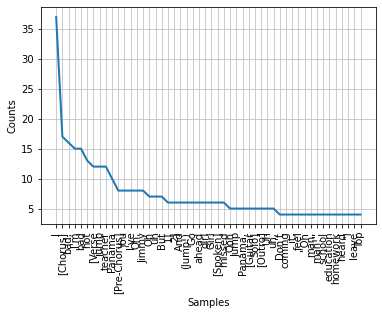

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
#Plotting words and frequency for visualization purpose
frequency_of_clean_album_words.plot(50, cumulative=False)

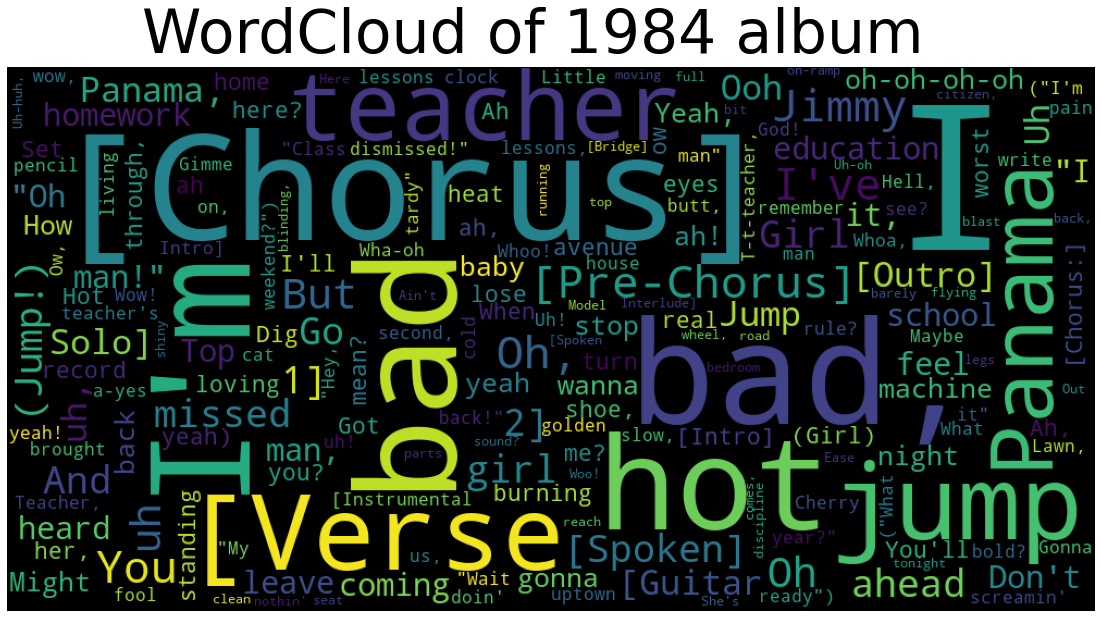

In [25]:
count_clean_album_word_list = Counter(clean_album_word_list)
wordcloud_1984_album = WordCloud(width=1000, height=500).generate_from_frequencies(count_clean_album_word_list)

plt.figure(figsize=(20,10))
plt.figtext(.5,.9,"WordCloud of 1984 album", fontsize=60, ha='center')
plt.imshow(wordcloud_1984_album)
plt.axis('off')
plt.show()

In [26]:
#cleaning novel words
clean_novel_word_list=[]

for word in novel_word_list:
    if word not in stopwords:
        clean_novel_word_list.append(word)

In [27]:
clean_novel_word_list

['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'ONE',
 'Chapter',
 '1',
 'It',
 'bright',
 'cold',
 'day',
 'April,',
 'clocks',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'chin',
 'nuzzled',
 'breast',
 'effort',
 'escape',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'glass',
 'doors',
 'Victory',
 'Mansions,',
 'quickly',
 'prevent',
 'swirl',
 'gritty',
 'dust',
 'entering',
 'him.',
 'The',
 'hallway',
 'smelt',
 'boiled',
 'cabbage',
 'rag',
 'mats.',
 'At',
 'end',
 'coloured',
 'poster,',
 'large',
 'indoor',
 'display,',
 'tacked',
 'wall.',
 'It',
 'depicted',
 'simply',
 'enormous',
 'face,',
 'metre',
 'wide:',
 'face',
 'man',
 'forty-five,',
 'heavy',
 'black',
 'moustache',
 'ruggedly',
 'handsome',
 'features.',
 'Winston',
 'made',
 'stairs.',
 'It',
 'lift.',
 'Even',
 'times',
 'seldom',
 'working,',
 'present',
 'electric',
 'current',
 'cut',
 'daylight',
 'hours.',
 'It'

In [28]:
#checking the frequency of clean novel word list
frequency_of_clean_novel_word_list = nltk.FreqDist(clean_novel_word_list)

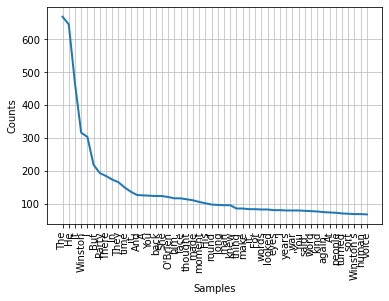

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
frequency_of_clean_novel_word_list.plot(50, cumulative=False)

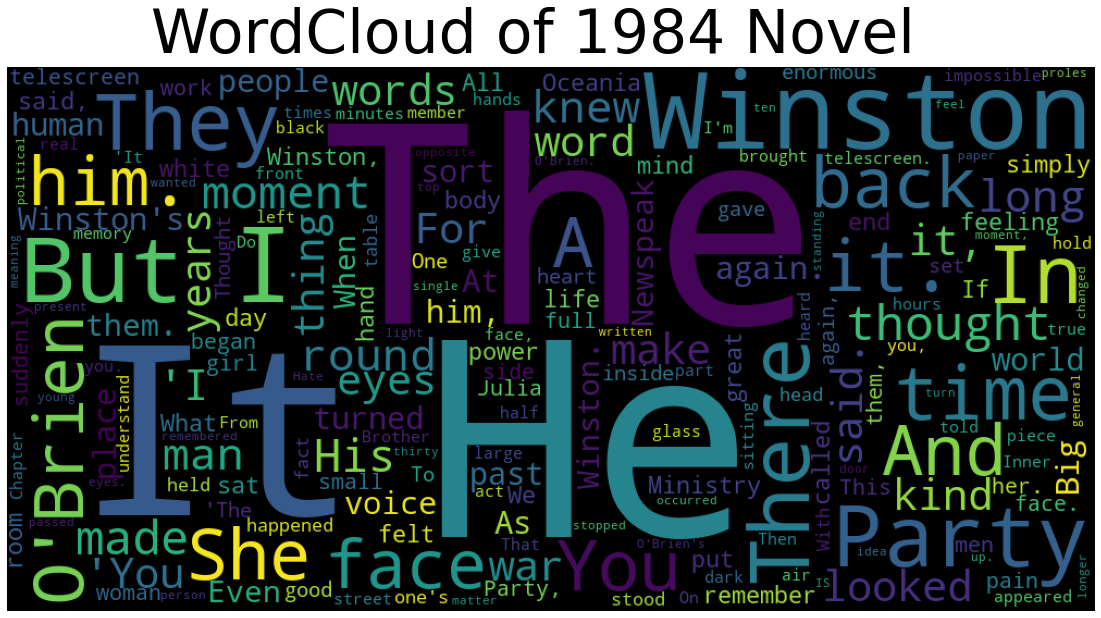

In [30]:
word_cloud_novel_word_list = Counter(clean_novel_word_list)
word_cloud_1984_novel = WordCloud(width= 1000, height =500).generate_from_frequencies(word_cloud_novel_word_list)

plt.figure(figsize=(20,10))
plt.figtext(.5,.9, "WordCloud of 1984 Novel", fontsize = 60, ha='center')
plt.imshow(word_cloud_1984_novel)
plt.axis('off')
plt.show()

# NLP Summarization 

In [31]:
#punkt is a tokenizer for summarizing 
nltk.download('punkt')

#lsa is used for deriving meaning behind words
lsa = LsaSummarizer(Stemmer('english'))
lsa.stop_words = get_stop_words('english')
parser = PlaintextParser.from_string(' '.join(album_corpus), Tokenizer('english'))
lsa_summary = lsa(parser.document,10)
lsa_summary_list = [str(sentence) for sentence in lsa_summary]

summary_album = " ".join(lsa_summary_list)
print("Summary of 1984 album")
summary_album

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fahdmohammed/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Summary of 1984 album


"Here she comes, full blast and top down Hot shoe, burning down the avenue Model citizen, zero discipline [Verse 2] Ain't nothin' like it, her shiny machine Got the feel for the wheel, keep the moving parts clean Hot shoe, burning down the avenue Out an on-ramp coming through my bedroom [Spoken Interlude] Ah Yeah, we're running a little bit hot tonight I can barely see the road from the heat coming off it, I say I reach down between my legs and Ease the seat back [Bridge] She's blinding, I'm flying Right behind in rearview mirror now Got the fearing, power steering Pistons popping, ain't no stopping now Dig those moves, vampire Set me loose, get it higher Throw my rope, loop-de-loop Nice white teeth, Betty Boop Set it cool, real heavy I ain't fooled, gettin' ready Oooh, aw baby [Verse 1] I get up and nothing gets me down You got it tough, I've seen the toughest around And I know, baby, just how you feel You gotta roll with the punches to get to what's real [Verse 2] Found that girl wit

In [32]:
#punkt is a tokenizer for summarizing 
nltk.download('punkt')

#lsa is used for deriving meaning behind words
lsa = LsaSummarizer(Stemmer('english'))
lsa.stop_words = get_stop_words('english')
parser = PlaintextParser.from_string(' '.join(novel_corpus), Tokenizer('english'))
lsa_summary = lsa(parser.document,20)
lsa_summary_list = [str(sentence) for sentence in lsa_summary]

summary_novel = " ".join(lsa_summary_list)
print("Summary of 1984 novel")
summary_novel

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fahdmohammed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/fahdmohammed/opt/anaconda3/lib/python3.9/site-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (5813) is lower than number of sentences (6827). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))


Summary of 1984 novel


"When one knew that any document was due for destruction, or even when one saw a scrap of waste paper lying about, it was an automatic action to lift the flap of the nearest memory hole and drop it in, whereupon it would be whirled away on a current of warm air to the enormous furnaces which were hidden somewhere in the recesses of the building. And a few cubicles away a mild, ineffectual, dreamy creature named Ampleforth, with very hairy ears and a surprising talent for juggling with rhymes and metres, was engaged in producing garbled versions--definitive texts, they were called--of poems which had become ideologically offensive, but which for one reason or another were to be retained in the anthologies. And the Records Department, after all, was itself only a single branch of the Ministry of Truth, whose primary job was not to reconstruct the past but to supply the citizens of Oceania with newspapers, films, textbooks, telescreen programmes, plays, novels--with every conceivable kind

# NLP Sentiment Analysis

In [34]:
nltk.download('vader_lexicon')

sentiment_analyzer = SentimentIntensityAnalyzer()
print('Sentiment Analysis of 1984 Album')
print(sentiment_analyzer.polarity_scores(" ".join(album_corpus)))

Sentiment Analysis of 1984 Album
{'neg': 0.165, 'neu': 0.722, 'pos': 0.113, 'compound': -0.9986}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fahdmohammed/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
print('Sentiment Analysis of 1984 Novel')
print(sentiment_analyzer.polarity_scores(" ".join(novel_corpus)))

Sentiment Analysis of 1984 Novel
{'neg': 0.106, 'neu': 0.798, 'pos': 0.096, 'compound': -1.0}
